In [2]:
import os
import glob
import json
import re
from collections import defaultdict

import dcm_utils as dcmu
import pydicom
import matplotlib.pyplot as plt
from natsort import natsorted

# Preview Dicoms
Patient #1, Slice 1

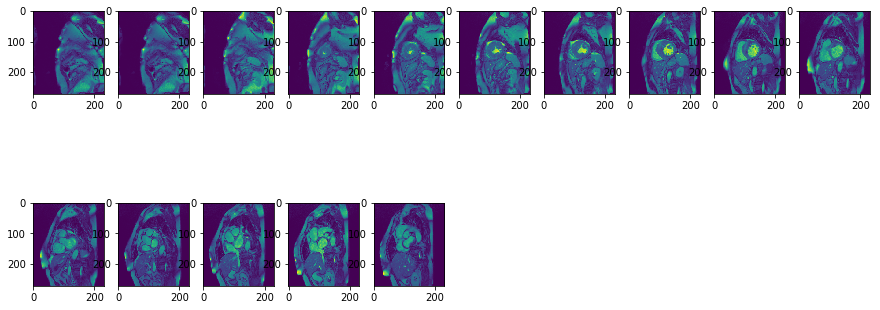

In [7]:
path_format=  'cine/001/{0}/anon_ser{0:03d}img{1:05d}.dcm'
dcms = []
plt.figure(figsize=(15,10))
for i in range(15):
    path = path_format.format(i + 63, 1)
    dcms.append(pydicom.dcmread(path))
    plt.subplot(3, 10, i + 1)
    dcmu.plot_dicom(dcms[i - 1])

# Slice 1 By Patient

In [12]:
paths = glob.glob('cine/**/*img00001.dcm', recursive=True)
paths = natsorted(paths)

re_dcm = re.compile('cine/([0-9]{3}).+')
dcm_by_patient = defaultdict(list)
for p in paths:
    match = re_dcm.search(p)
    patient_index = int(match.group(1))
    dcm_by_patient[patient_index].append(p)

print(json.dumps(dcm_by_patient, indent=4))

{
    "1": [
        "cine/001/63/anon_ser063img00001.dcm",
        "cine/001/64/anon_ser064img00001.dcm",
        "cine/001/65/anon_ser065img00001.dcm",
        "cine/001/66/anon_ser066img00001.dcm",
        "cine/001/67/anon_ser067img00001.dcm",
        "cine/001/68/anon_ser068img00001.dcm",
        "cine/001/69/anon_ser069img00001.dcm",
        "cine/001/70/anon_ser070img00001.dcm",
        "cine/001/71/anon_ser071img00001.dcm",
        "cine/001/72/anon_ser072img00001.dcm",
        "cine/001/73/anon_ser073img00001.dcm",
        "cine/001/74/anon_ser074img00001.dcm",
        "cine/001/75/anon_ser075img00001.dcm",
        "cine/001/76/anon_ser076img00001.dcm",
        "cine/001/77/anon_ser077img00001.dcm"
    ]
}


# cr_interface Format

In [13]:
for pid, paths in dcm_by_patient.items():
    for i, path in enumerate(paths):
        print(pid, i, path)

1 0 cine/001/63/anon_ser063img00001.dcm
1 1 cine/001/64/anon_ser064img00001.dcm
1 2 cine/001/65/anon_ser065img00001.dcm
1 3 cine/001/66/anon_ser066img00001.dcm
1 4 cine/001/67/anon_ser067img00001.dcm
1 5 cine/001/68/anon_ser068img00001.dcm
1 6 cine/001/69/anon_ser069img00001.dcm
1 7 cine/001/70/anon_ser070img00001.dcm
1 8 cine/001/71/anon_ser071img00001.dcm
1 9 cine/001/72/anon_ser072img00001.dcm
1 10 cine/001/73/anon_ser073img00001.dcm
1 11 cine/001/74/anon_ser074img00001.dcm
1 12 cine/001/75/anon_ser075img00001.dcm
1 13 cine/001/76/anon_ser076img00001.dcm
1 14 cine/001/77/anon_ser077img00001.dcm
